<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from helpers_image import show
from helpers_config import load_config, save_config
from unet import UNet

Using TensorFlow backend.


In [2]:
config = load_config()#path="../output/unet/config.json")
#dir_name = datetime.today().strftime("%Y%m%d_%H%M%S")
save_dir = config['dst_path'] + config['model_name'] + "/"

save_dir

'../output/unet_04/'

In [4]:
pipeline = UNet(data_dir=config['data_dir'],
                grayscale=config['grayscale'],
                tr_losses=config['tr_losses'],
                val_losses=config['val_losses'],
                stride=config['stride'],
                telepyth_token=config['telepyth_token'])

In [5]:
X_tr, Y, X_te = pipeline.load_data(patch_size=config['patch_size'],
                                   normalized=config['normalized'],
                                   gamma=config['gamma'],
                                   clahe=config['clahe'],
                                   rotations=config['rotations'],
                                   sample_tr_img=config['sample_tr_img'],
                                   sample_te_img=config['sample_te_img'])

KeyboardInterrupt: 

In [ ]:
X_tr.shape, Y.shape, X_te.shape

In [1]:
i = 0
show([X_tr[i], Y[i]])

NameError: name 'show' is not defined

In [12]:
#'''
pipeline.train_model(X_tr=X_tr,
                     Y=Y,
                     epochs=config['epochs'],
                     sample_img=config['sample_tr_img'],
                     batch_size=config['batch_size'],
                     verbose=config['verbose'],
                     validation_split=config['validation_split'],
                     shuffle=config['shuffle'],
                     load_checkpoint=config['load_checkpoint'],
                     checkpoint_path=save_dir,
                     save_best_only=config['save_best_only'],
                     sub_epochs=config['sub_epochs'])
'''
pipeline.load_model(save_dir + 'weights.hdf5')
#'''

Train on 7056 samples, validate on 1764 samples
Epoch 1/1


KeyboardInterrupt: 

In [12]:
pipeline.initial_epoch

0

In [13]:
pipeline.val_losses

[]

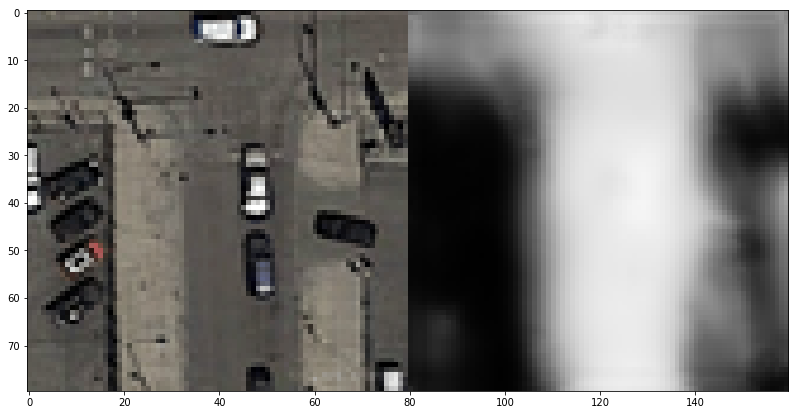

In [14]:
i = 91
show([X_te[i], predictions[i]])

In [27]:
Y_tr = pipeline.predict(X_tr[:21*21], sample_img=5, batch_size=100)

441/441 [==============================] - 77s 174ms/step


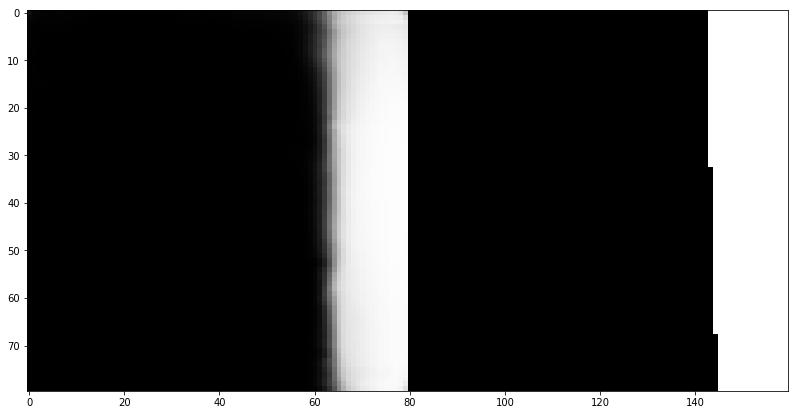

In [28]:
i = 8
show([Y_tr[i], Y[i]])

In [17]:
pipeline.save_output(predictions, save_dir, config.copy())

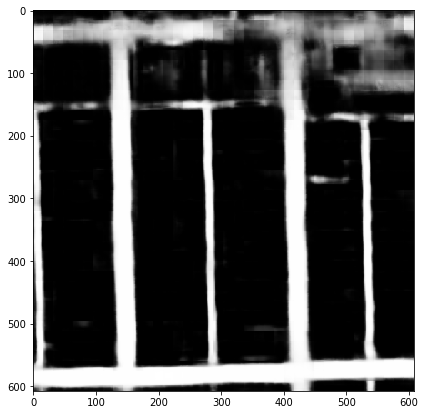

In [42]:
from helpers_image import patches_to_images, patches_to_img

show(patches_to_images(predictions, 16, (608,608)))

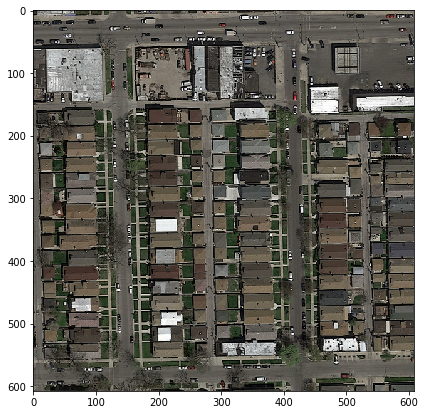

In [56]:
show(patches_to_images(X_te[:34*34], 16, (608,608,3)))

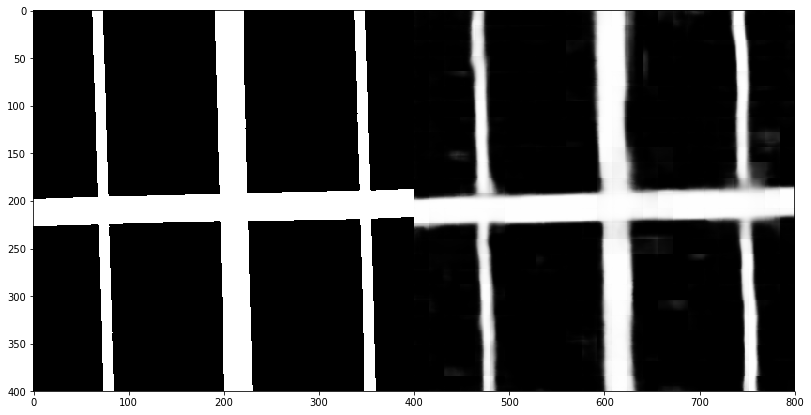

In [54]:
show([patches_to_img(Y[:21*21], 16, (400,400)), patches_to_img(Y_tr[:21*21], 16, (400,400))])